In [12]:
import numpy as np
import pandas as pd
import cv2
import seaborn as sns
from sklearn.linear_model import LogisticRegression

In [13]:
df = pd.read_csv('data_banknote_authentication.txt')
df.columns = ['variance', 'skewness', 'curtosis', 'entropy', 'Class']

In [14]:
df.shape

(1371, 5)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1371 entries, 0 to 1370
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1371 non-null   float64
 1   skewness  1371 non-null   float64
 2   curtosis  1371 non-null   float64
 3   entropy   1371 non-null   float64
 4   Class     1371 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [16]:
df.describe()

,variance,skewness,curtosis,entropy,Class
count,1371.000000,1371.000000,1371.000000,1371.000000,1371.000000
mean,0.431410,1.917434,1.400694,-1.192200,0.444931
std,2.842494,5.868359,4.310105,2.101683,0.497139
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.774700,-1.711300,-1.553350,-2.417000,0.000000
50%,0.495710,2.313400,0.616630,-0.586650,0.000000
75%,2.814650,6.813100,3.181600,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


Seperate the input and output variables

In [17]:
x = df.drop('Class', axis = 1)
y = df['Class']

In [18]:
y.value_counts()

Class
0    761
1    610
Name: count, dtype: int64

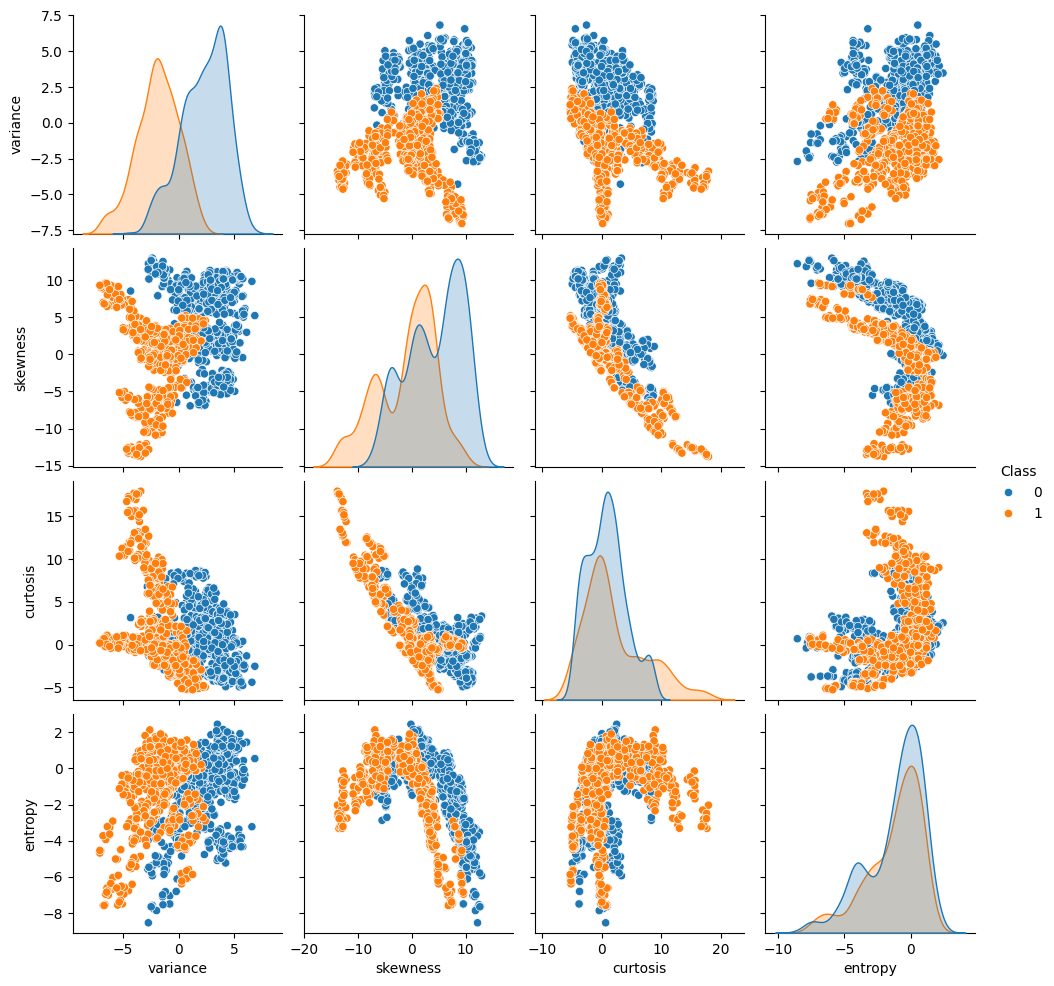

In [19]:
sns.pairplot(df, hue = 'Class')

In [20]:
from sklearn.model_selection import train_test_split

In [29]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 24, stratify = y)

In [30]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [31]:
from sklearn.metrics import accuracy_score

In [32]:
y_pred = lr.predict(X_test)

In [33]:
accuracy_score(y_test, y_pred)

0.9963636363636363

In [48]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

In [50]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       153
           1       0.99      1.00      1.00       122

    accuracy                           1.00       275
   macro avg       1.00      1.00      1.00       275
weighted avg       1.00      1.00      1.00       275



In [44]:
confusion_matrix = confusion_matrix(y_test, y_pred)

In [46]:
cm = ConfusionMatrixDisplay(confusion_matrix)

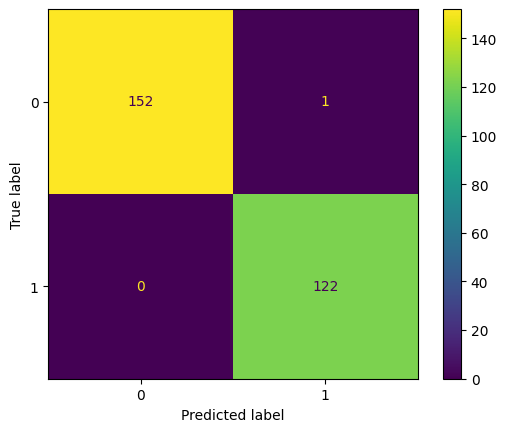

In [47]:
cm.plot()

In [56]:
new = pd.DataFrame({
    'variance' : ['-3.56370', '0.32924', '-1.38870'],
    'skewness' : ['-8.38270', '4.455620', '-4.87730'],
    'curtosis' : ['12.3930', '4.5718', '6.4774'],
    'entropy' : ['-1.28230', '-0.98880', '0.34179']
})

In [57]:
new

,variance,skewness,curtosis,entropy
0,-3.56370,-8.38270,12.3930,-1.28230
1,0.32924,4.455620,4.5718,-0.98880
2,-1.38870,-4.87730,6.4774,0.34179


In [58]:
lr.predict_proba(new)

array([[5.10162886e-02, 9.48983711e-01],
       [9.99999669e-01, 3.30868281e-07],
       [6.89731931e-02, 9.31026807e-01]])

In [59]:
lr.predict(new)

array([1, 0, 1], dtype=int64)